In [3]:
import json
import matplotlib.pyplot as plt

In [4]:
import json
import matplotlib.pyplot as plt

# JSON-Datei im aktuellen Arbeitsverzeichnis
file_name = 'GM_Heur_0_5.json'

# JSON-Daten laden
with open(file_name, 'r') as f:
    variable_values = json.load(f)

# Funktion zum Extrahieren von Variablenwerten aus den JSON-Daten
def extract_variable_values(variable_name):
    data = variable_values[variable_name]
    time_steps = sorted(data.keys(), key=lambda x: int(x))  # Zeitpunkte sortieren
    values = [data[ts] for ts in time_steps]
    return time_steps, values


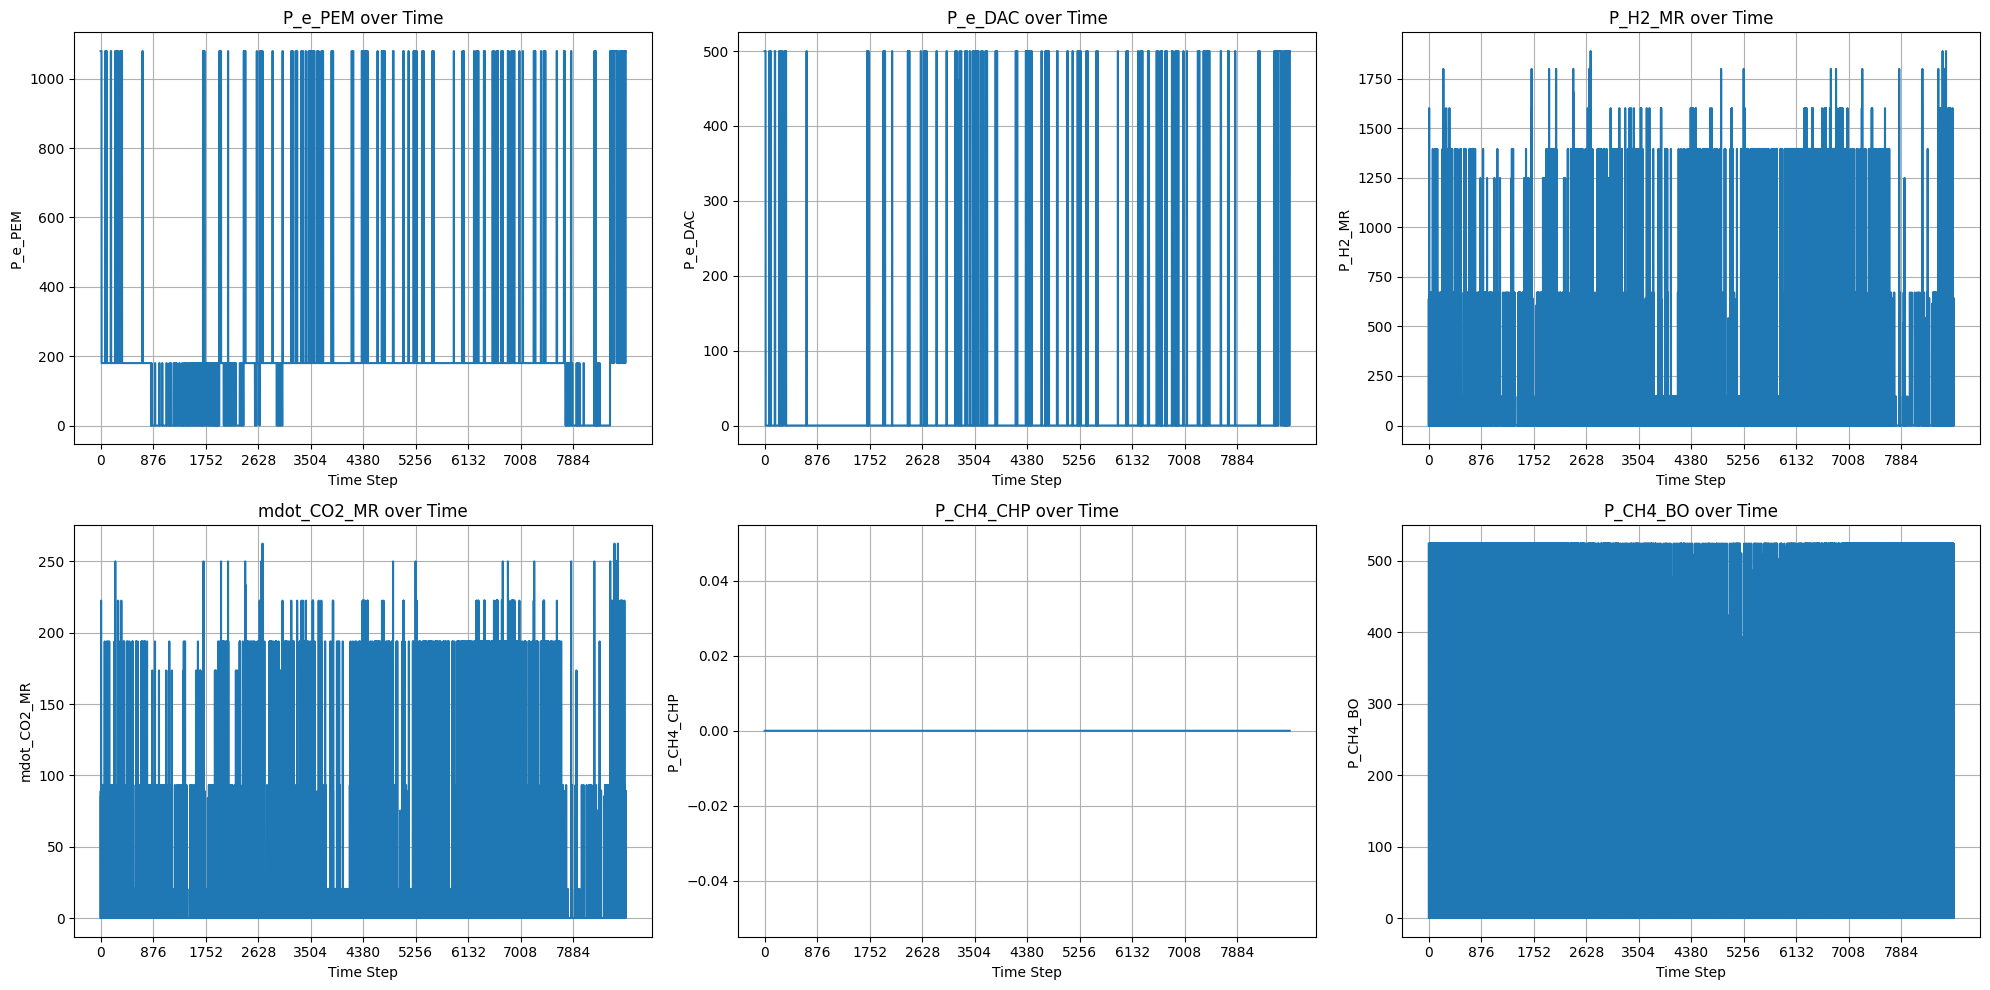

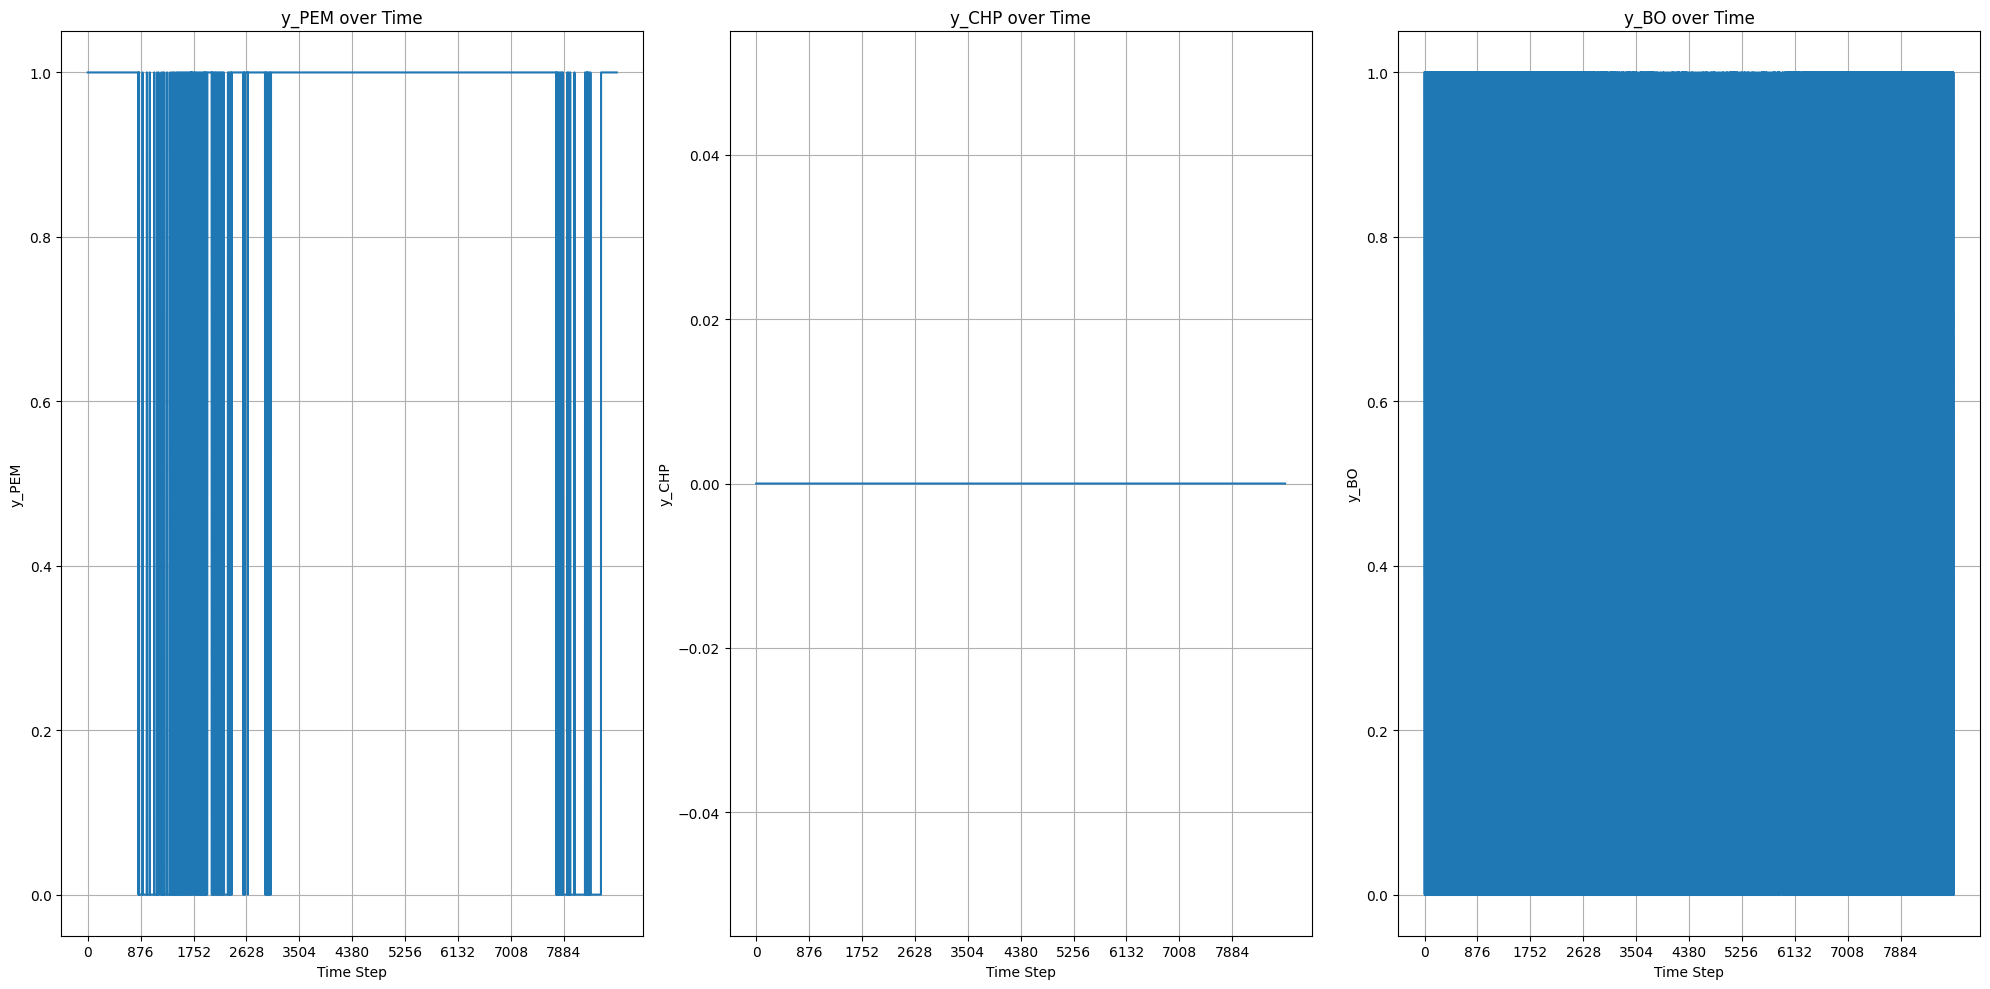

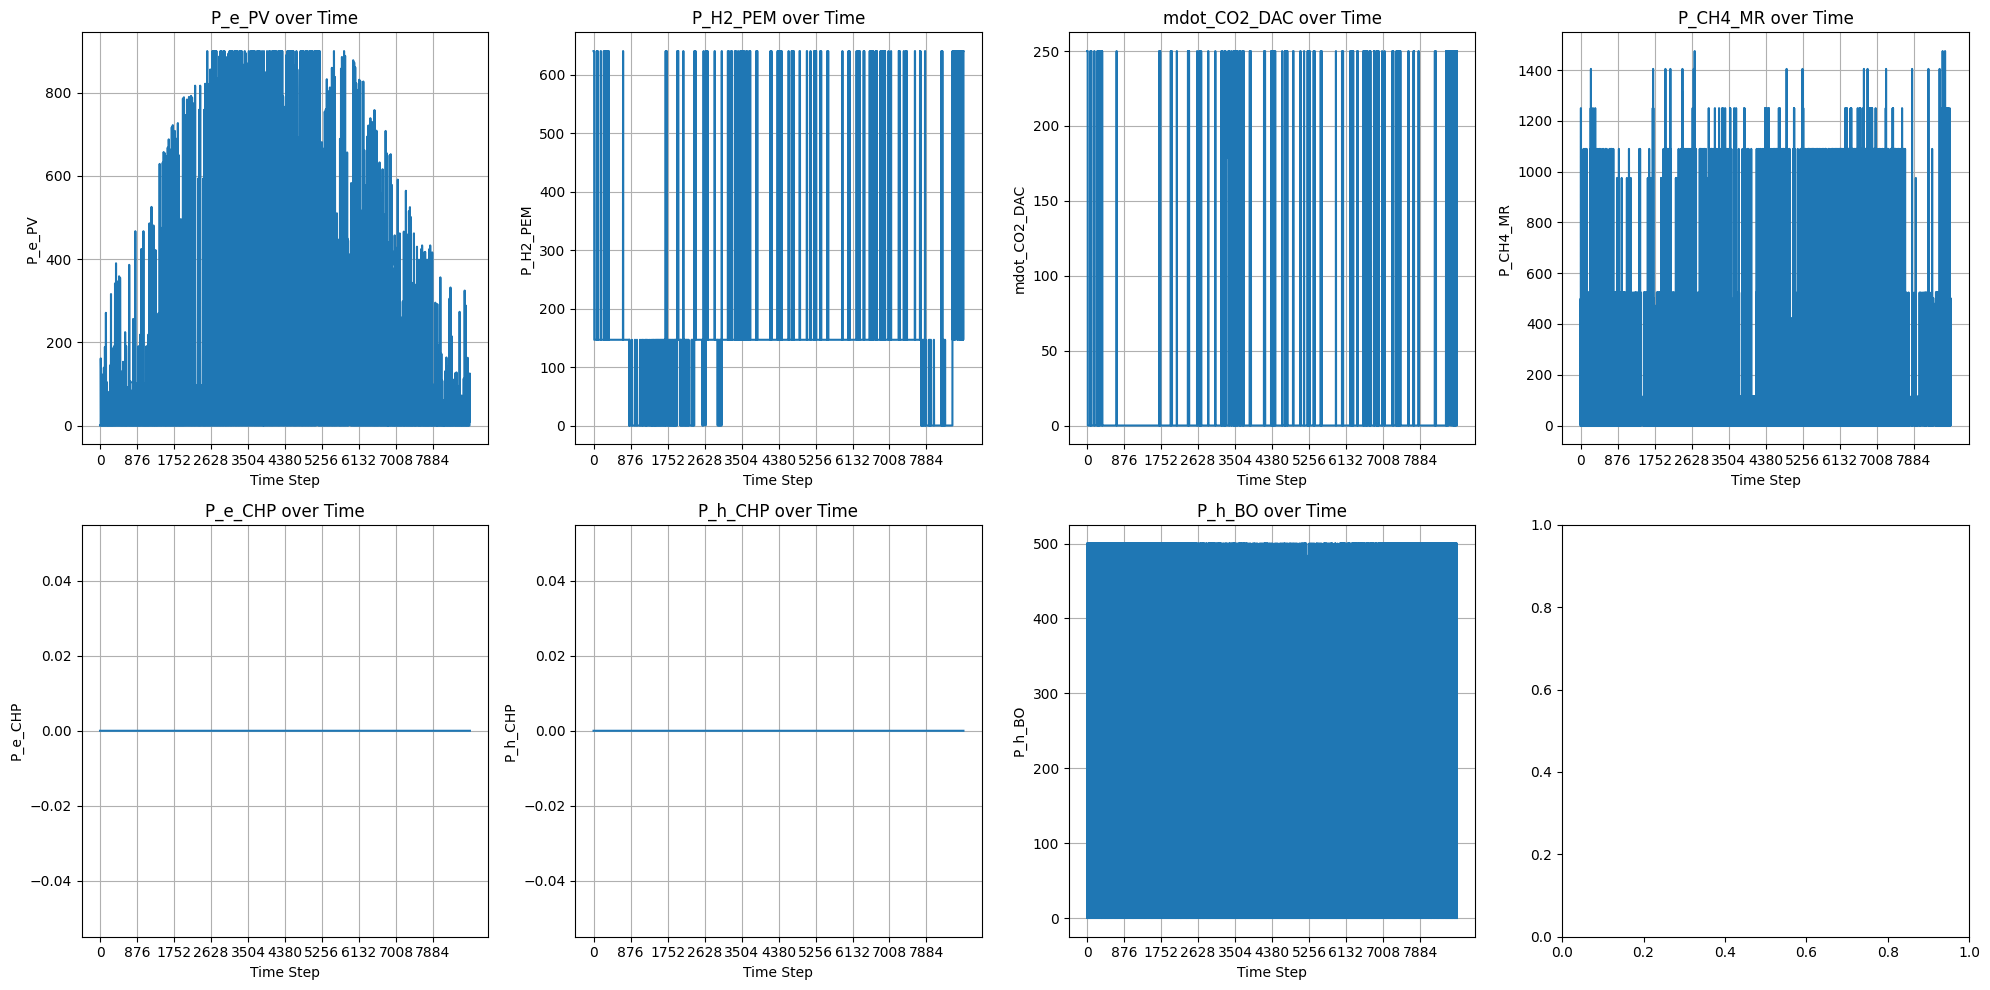

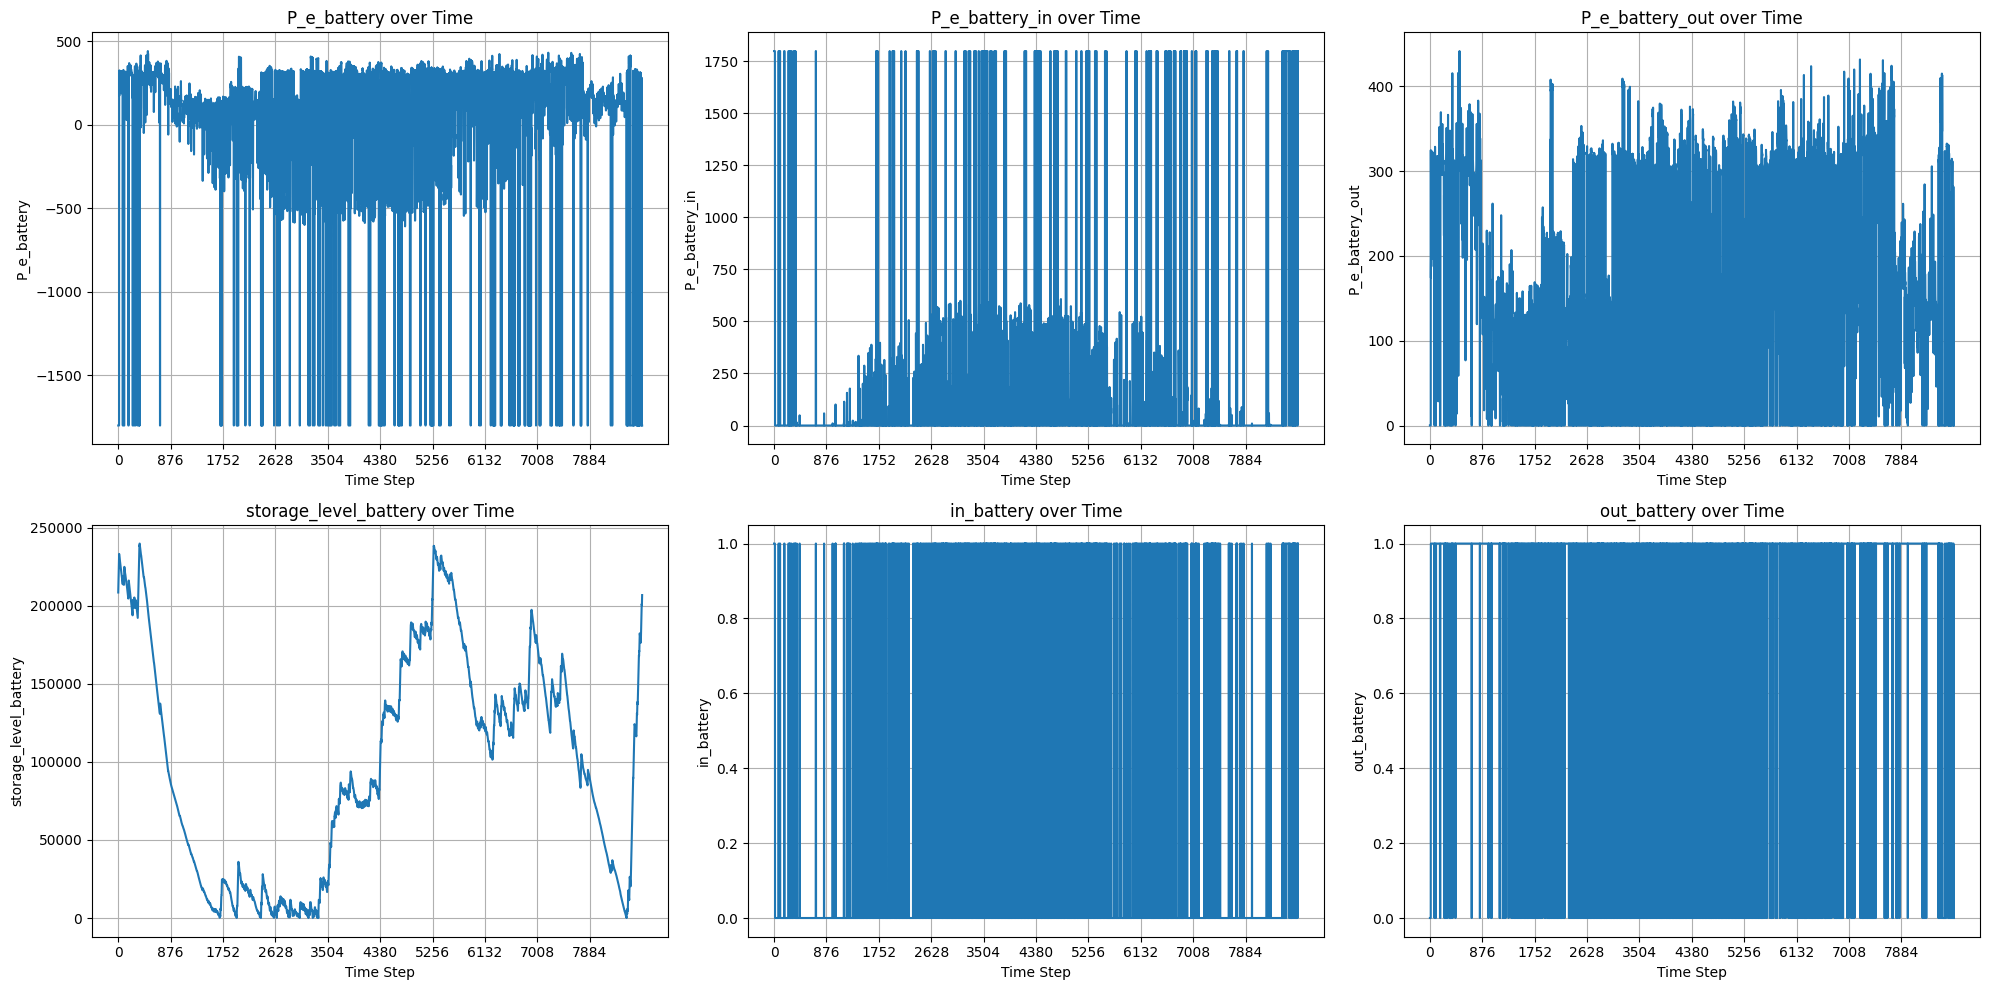

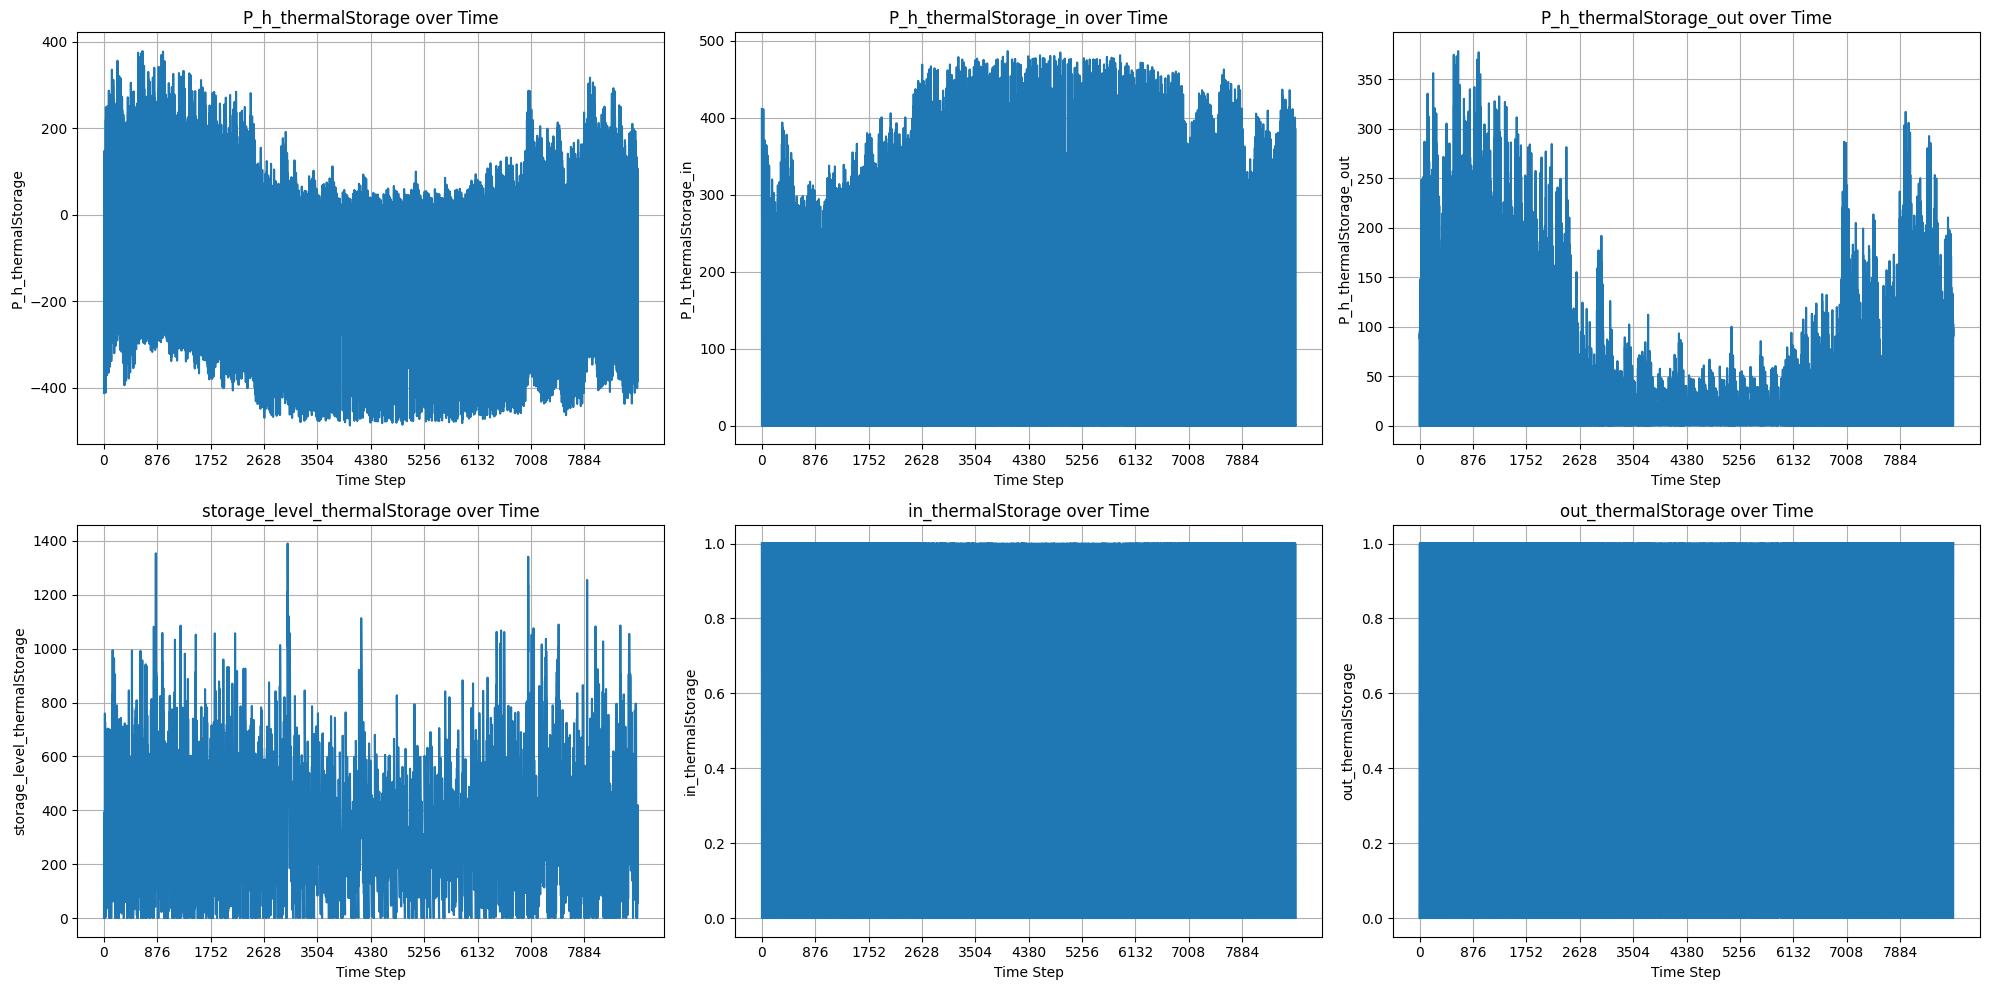

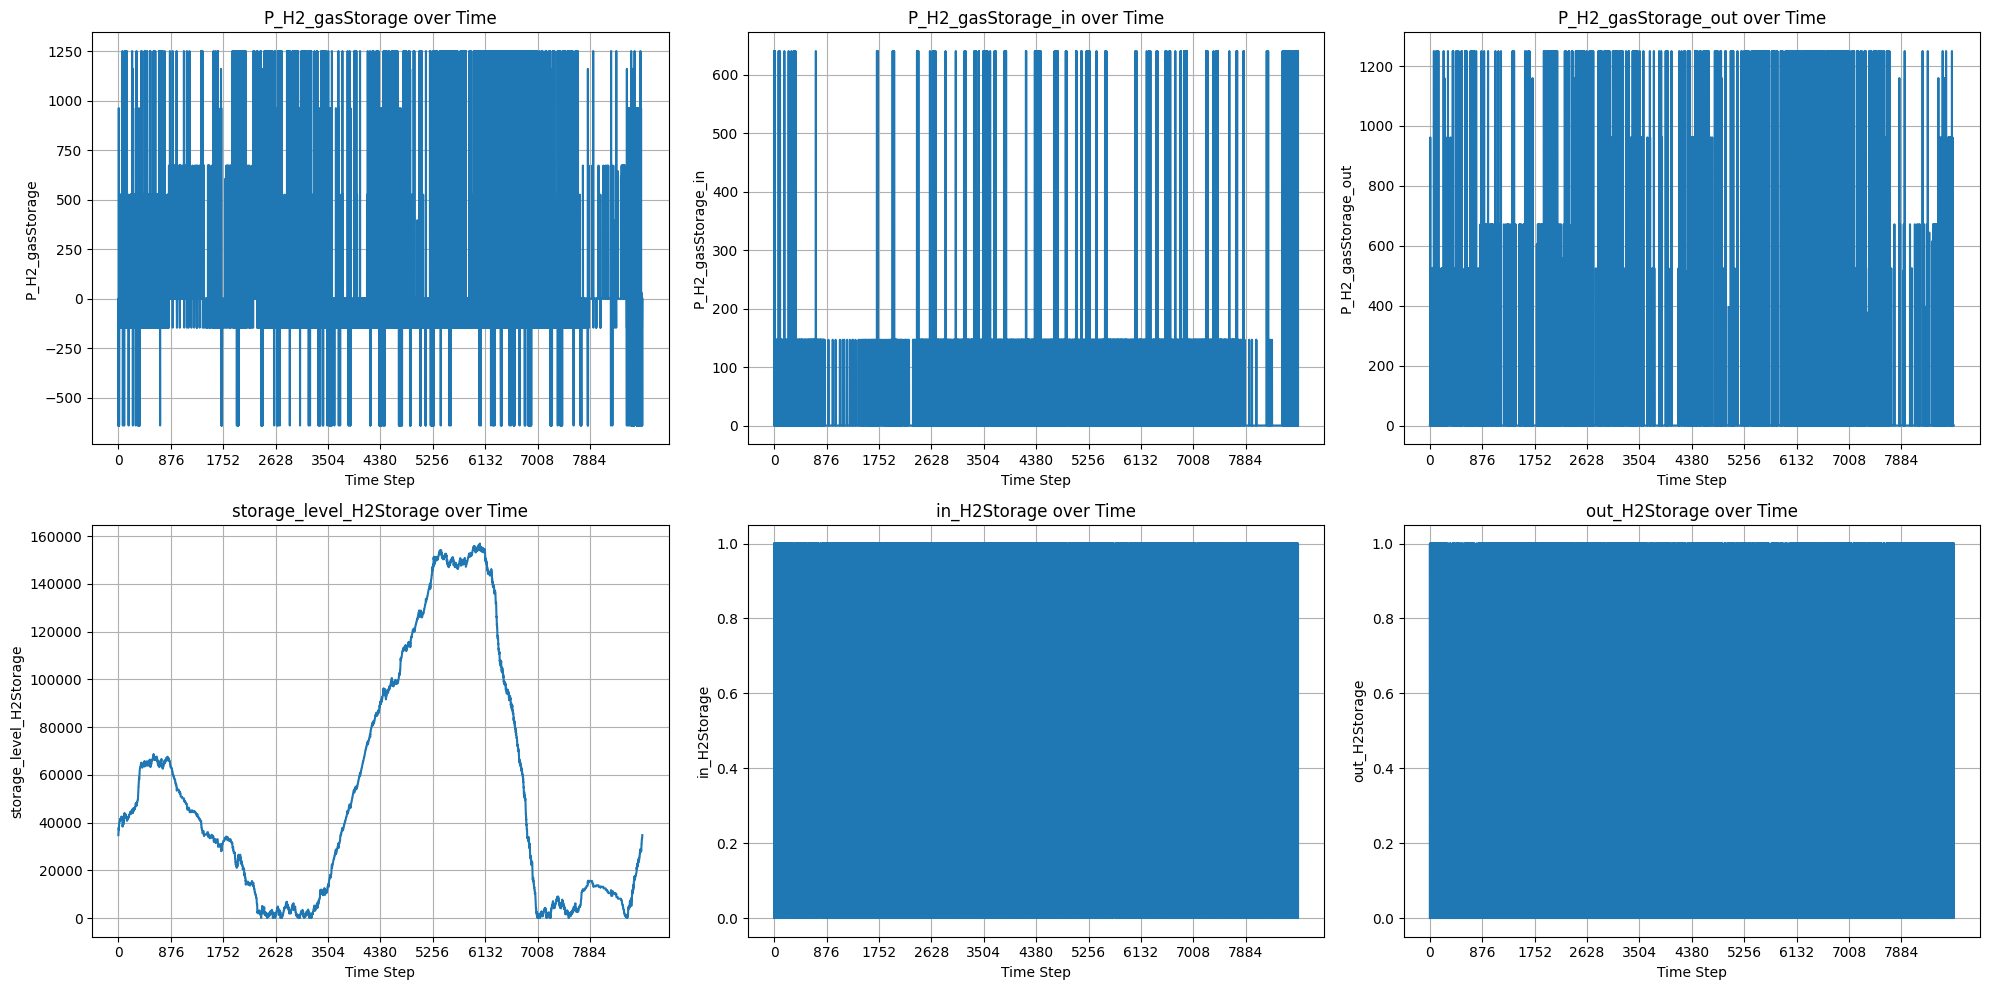

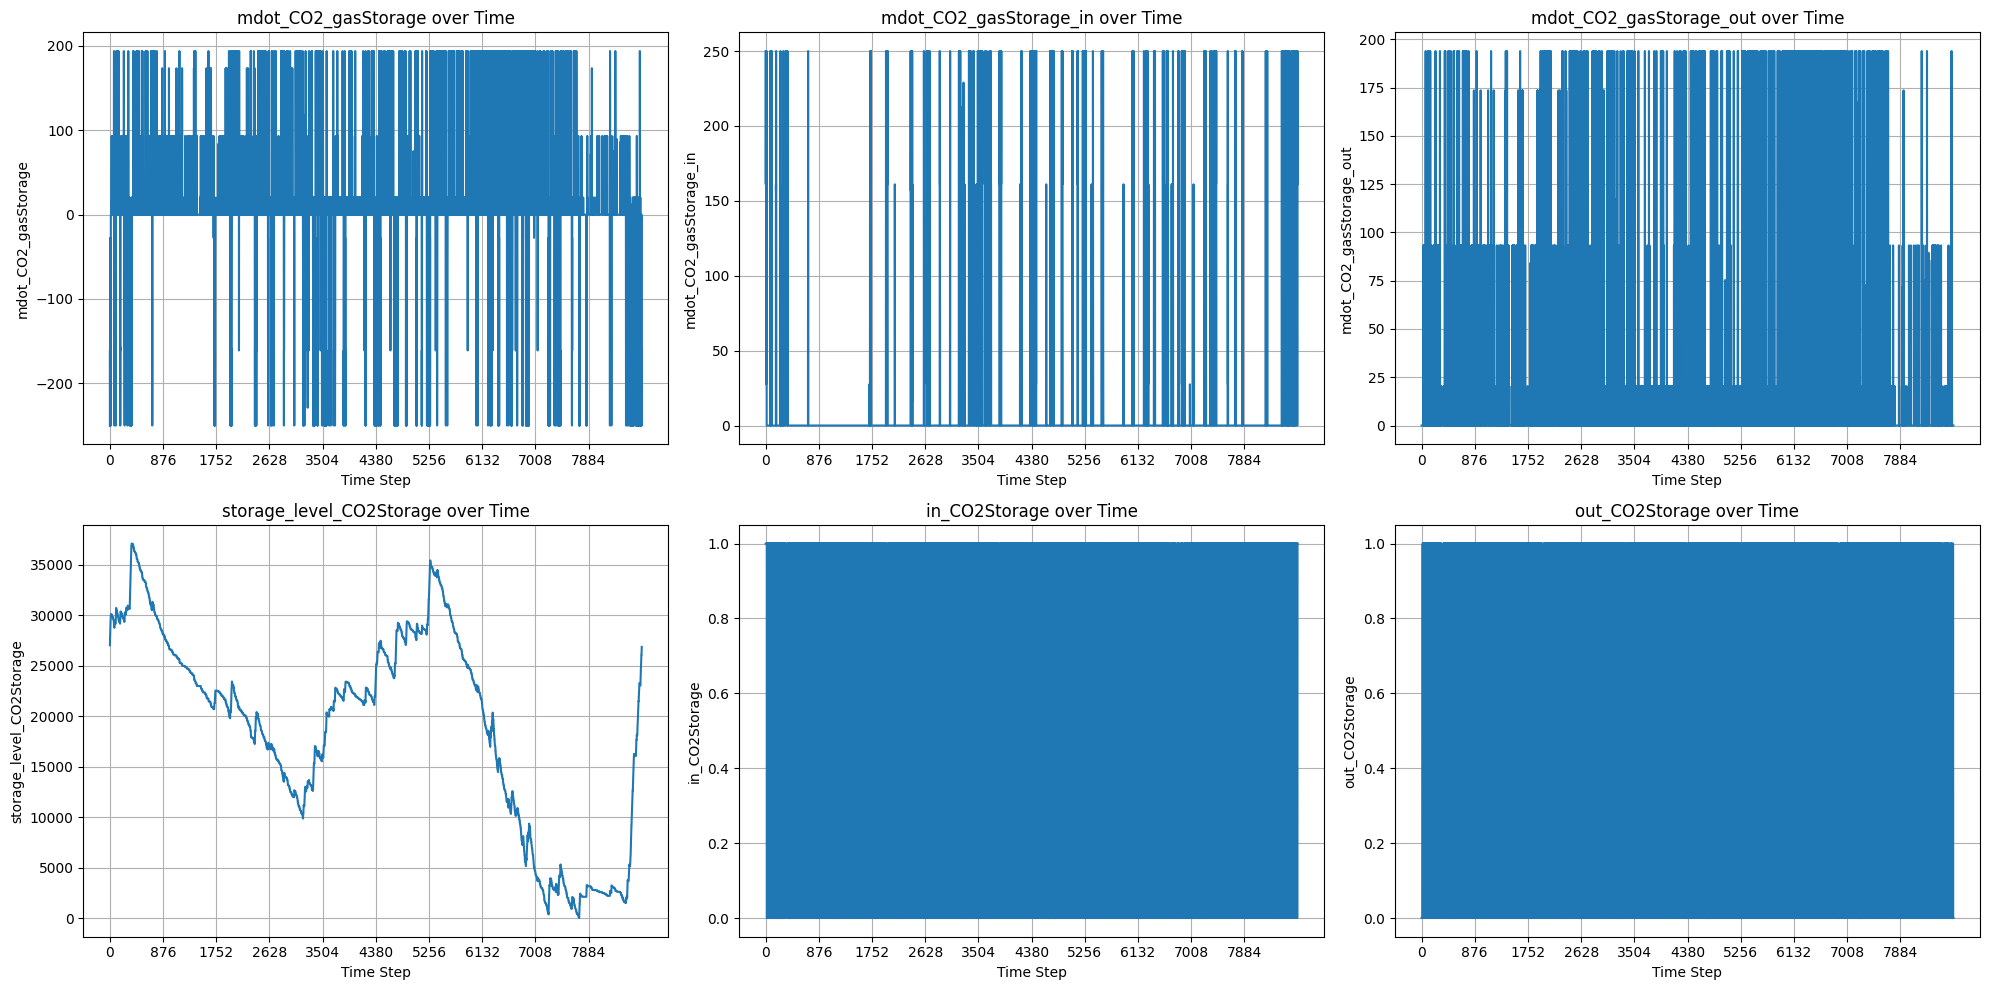

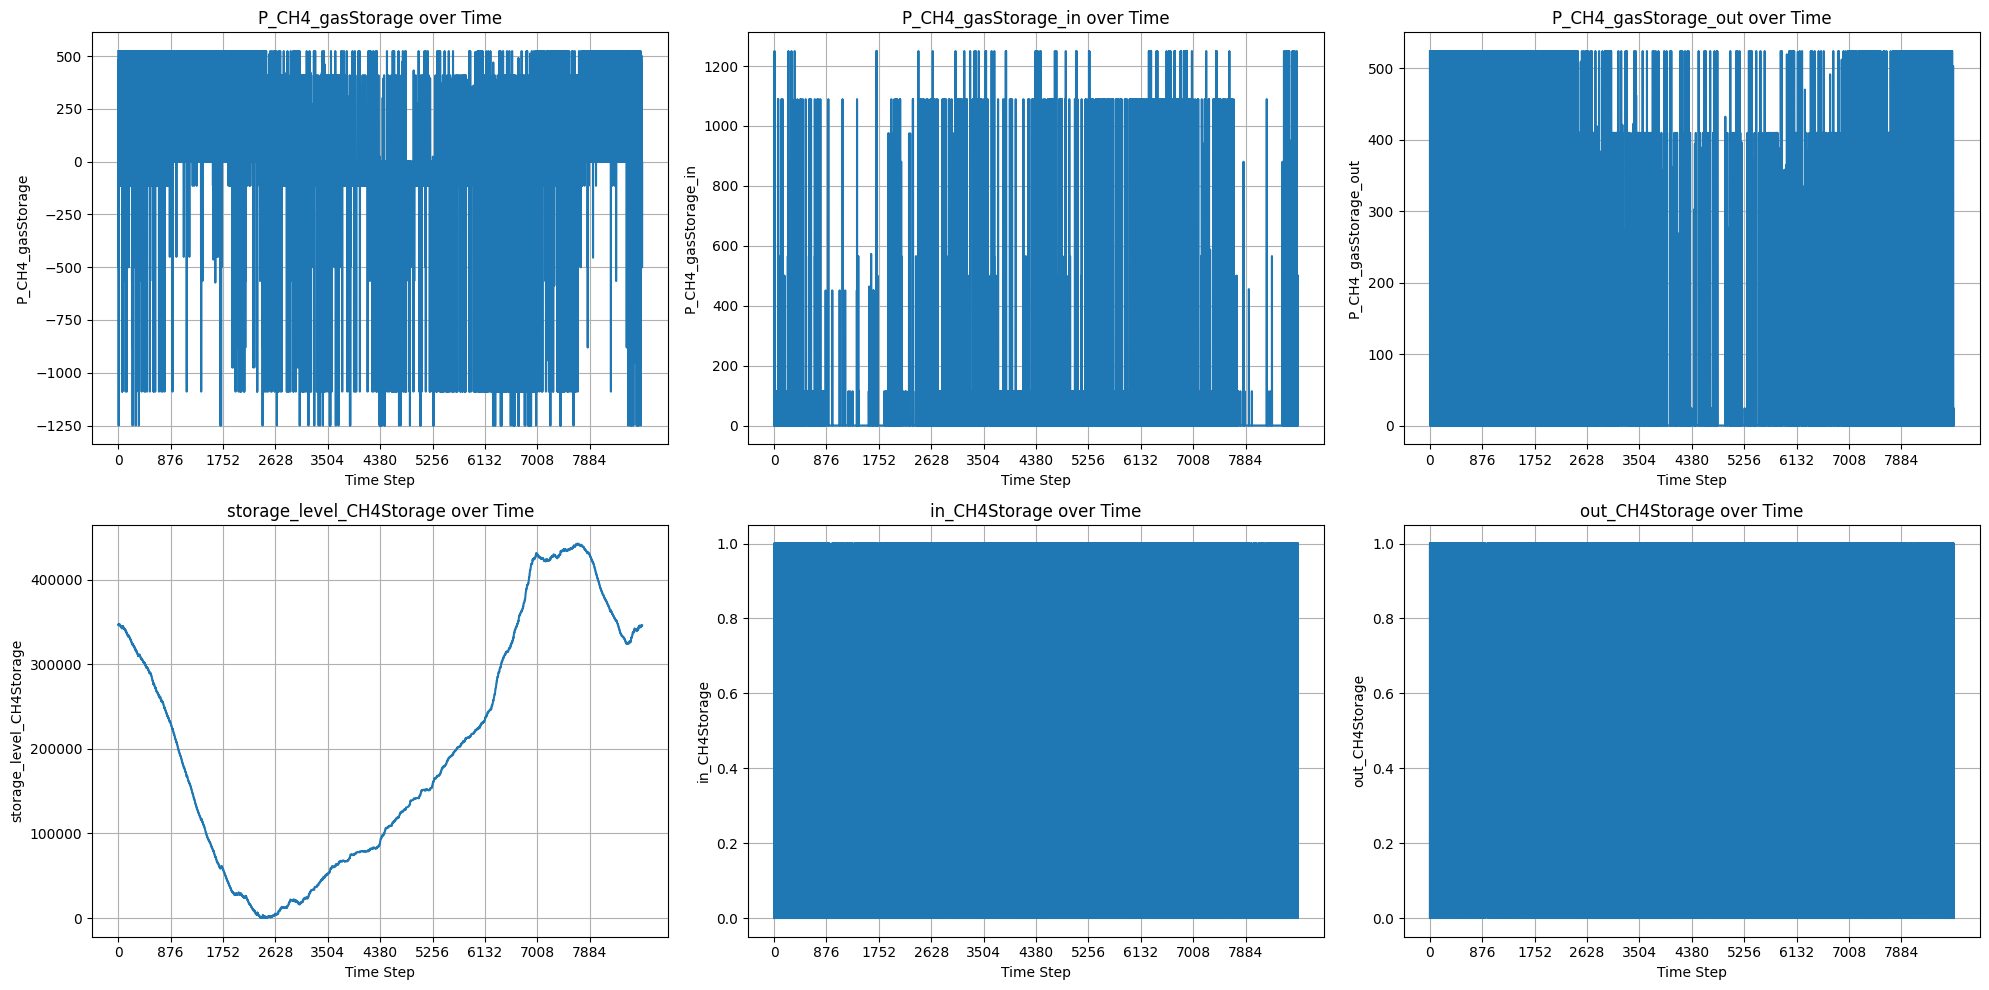

In [5]:
# Funktion zum Erstellen von Subplots mit weniger Beschriftungen und Strichen
def plot_variables(variable_names, nrows, ncols, figsize=(20, 10)):
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    axs = axs.flatten()
    
    for i, var_name in enumerate(variable_names):
        time_steps, values = extract_variable_values(var_name)
        axs[i].plot(time_steps, values)
        axs[i].set_xlabel('Time Step')
        axs[i].set_ylabel(var_name)
        axs[i].set_title(f'{var_name} over Time')
        axs[i].grid(True)
        
        # Weniger Beschriftungen auf der x-Achse
        if len(time_steps) > 10:
            axs[i].set_xticks(time_steps[::len(time_steps)//10])
        else:
            axs[i].set_xticks(time_steps)

    plt.tight_layout()
    plt.show()

# Plotte die ersten 6 Component Inputs
component_inputs_1 = ['P_e_PEM', 'P_e_DAC', 'P_H2_MR', 'mdot_CO2_MR', 'P_CH4_CHP', 'P_CH4_BO']
plot_variables(component_inputs_1, nrows=2, ncols=3)

# Plotte die nächsten 3 Component Inputs
component_inputs_2 = ['y_PEM', 'y_CHP', 'y_BO']
plot_variables(component_inputs_2, nrows=1, ncols=3)

# Plotte die Component Outputs
component_outputs = ['P_e_PV', 'P_H2_PEM', 'mdot_CO2_DAC', 'P_CH4_MR', 'P_e_CHP', 'P_h_CHP', 'P_h_BO']
plot_variables(component_outputs, nrows=2, ncols=4)

# Plotte die Batterie-Speicher
battery_storage = ['P_e_battery', 'P_e_battery_in', 'P_e_battery_out', 'storage_level_battery', 'in_battery', 'out_battery']
plot_variables(battery_storage, nrows=2, ncols=3)

# Plotte die Thermal-Speicher
thermal_storage = ['P_h_thermalStorage', 'P_h_thermalStorage_in', 'P_h_thermalStorage_out', 'storage_level_thermalStorage', 'in_thermalStorage', 'out_thermalStorage']
plot_variables(thermal_storage, nrows=2, ncols=3)

# Plotte die H2-Gasspeicher
H2_storage = ['P_H2_gasStorage', 'P_H2_gasStorage_in', 'P_H2_gasStorage_out', 'storage_level_H2Storage', 'in_H2Storage', 'out_H2Storage']
plot_variables(H2_storage, nrows=2, ncols=3)

# Plotte die CO2-Gasspeicher
CO2_storage = ['mdot_CO2_gasStorage', 'mdot_CO2_gasStorage_in', 'mdot_CO2_gasStorage_out', 'storage_level_CO2Storage', 'in_CO2Storage', 'out_CO2Storage']
plot_variables(CO2_storage, nrows=2, ncols=3)

# Plotte die CH4-Gasspeicher
CH4_storage = ['P_CH4_gasStorage', 'P_CH4_gasStorage_in', 'P_CH4_gasStorage_out', 'storage_level_CH4Storage', 'in_CH4Storage', 'out_CH4Storage']
plot_variables(CH4_storage, nrows=2, ncols=3)


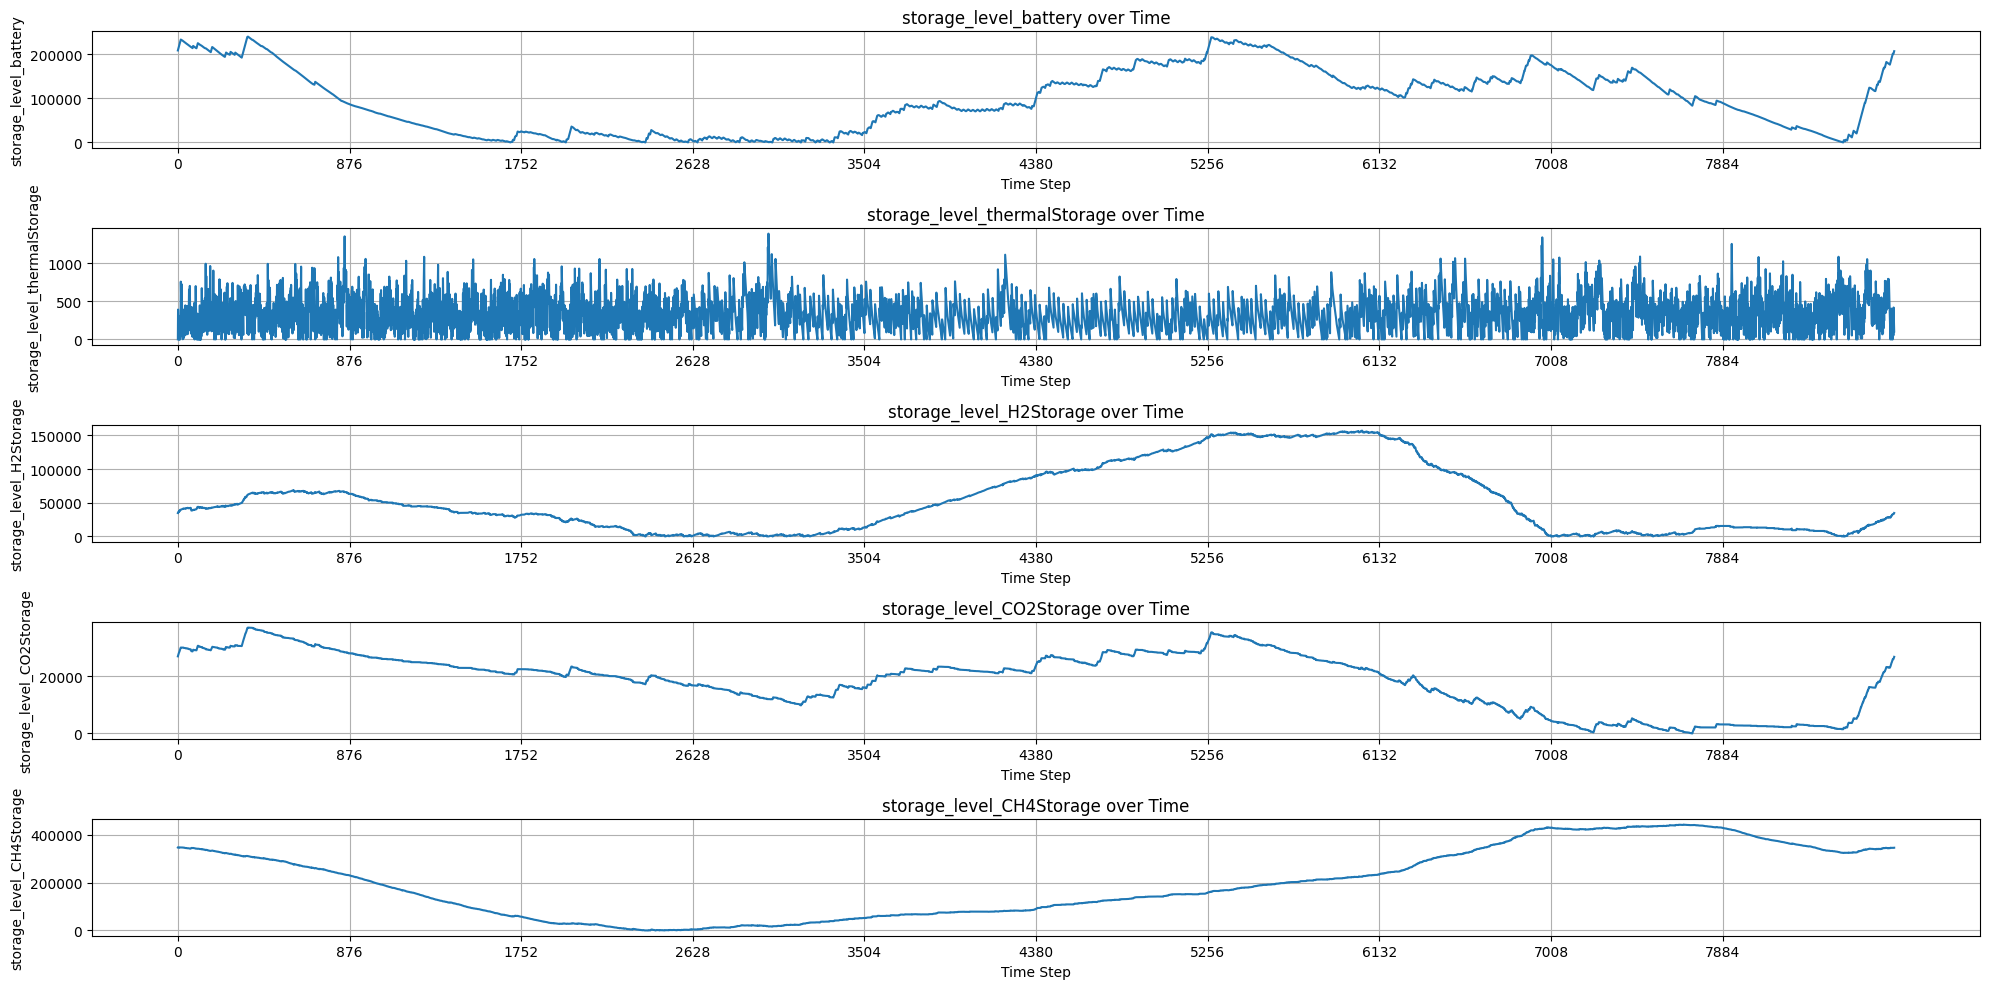

In [6]:
# Plotte die storage levels
component_outputs = ['storage_level_battery', 'storage_level_thermalStorage', 'storage_level_H2Storage', 'storage_level_CO2Storage', 'storage_level_CH4Storage']
plot_variables(component_outputs, nrows=5, ncols=1)


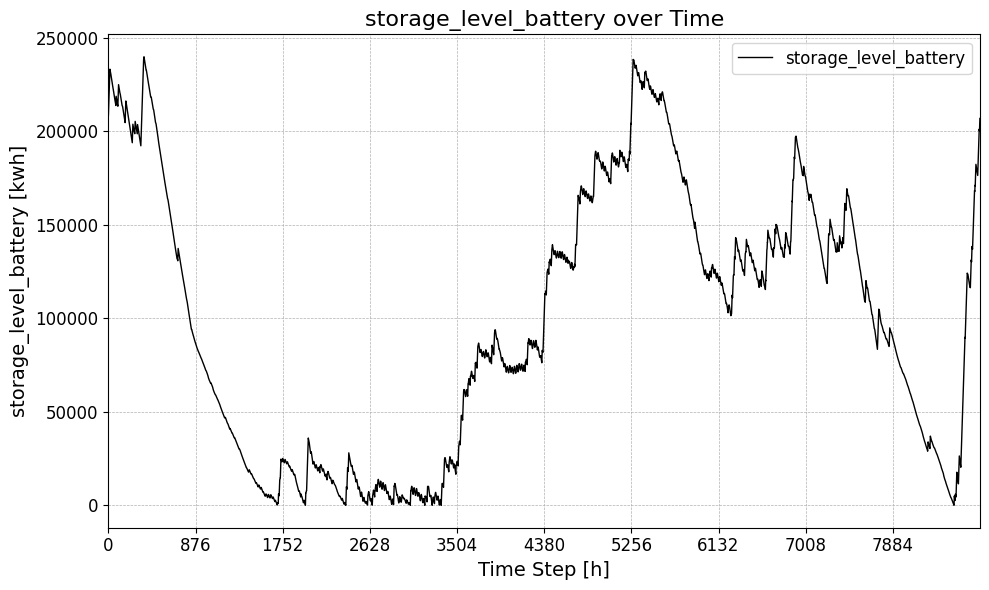

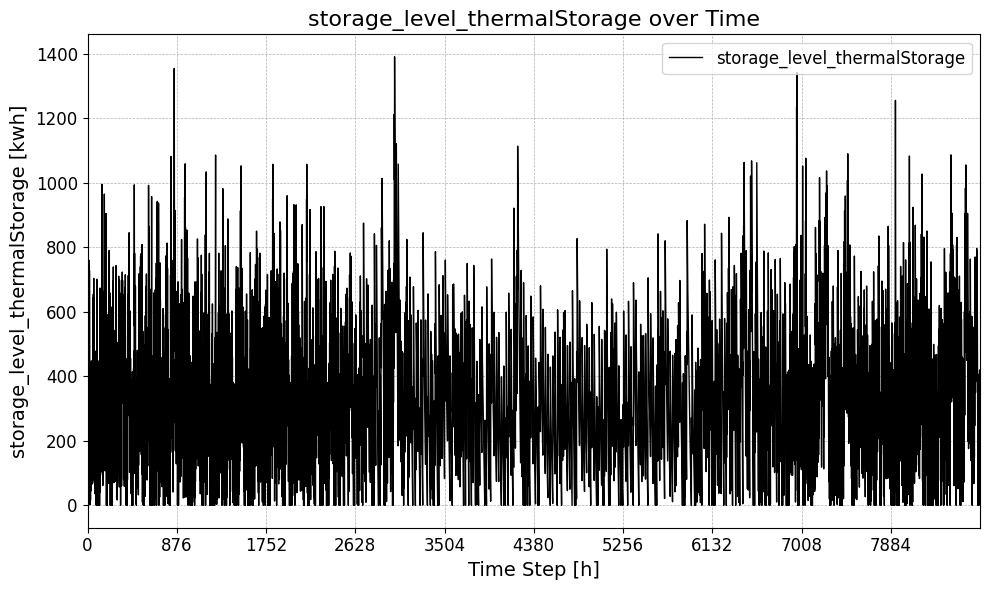

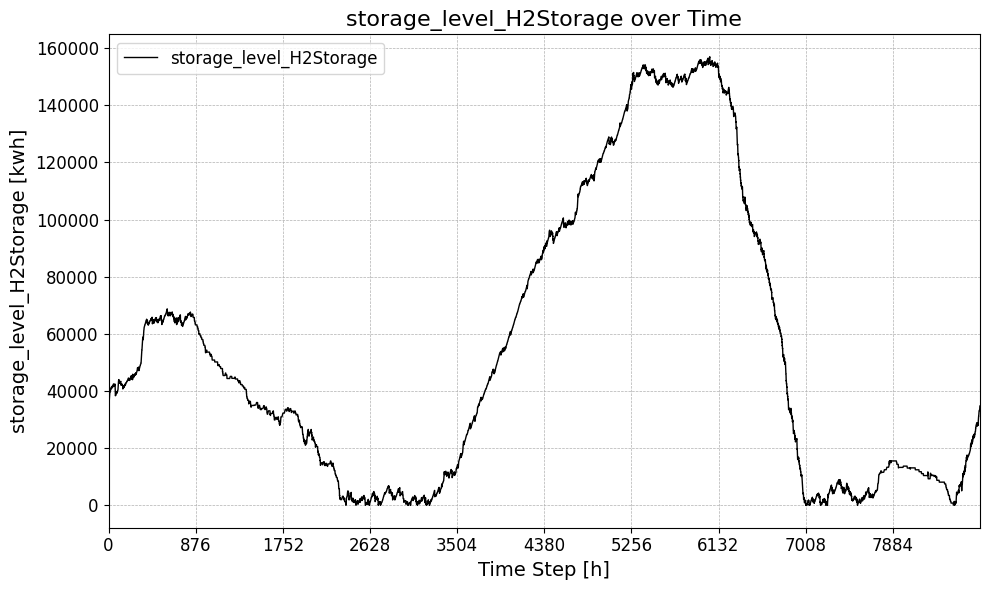

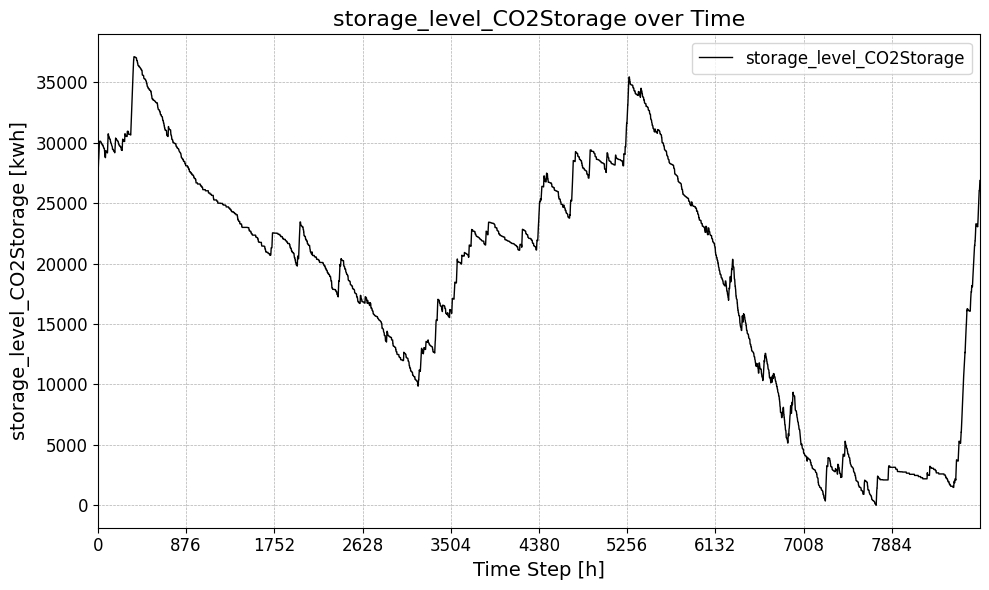

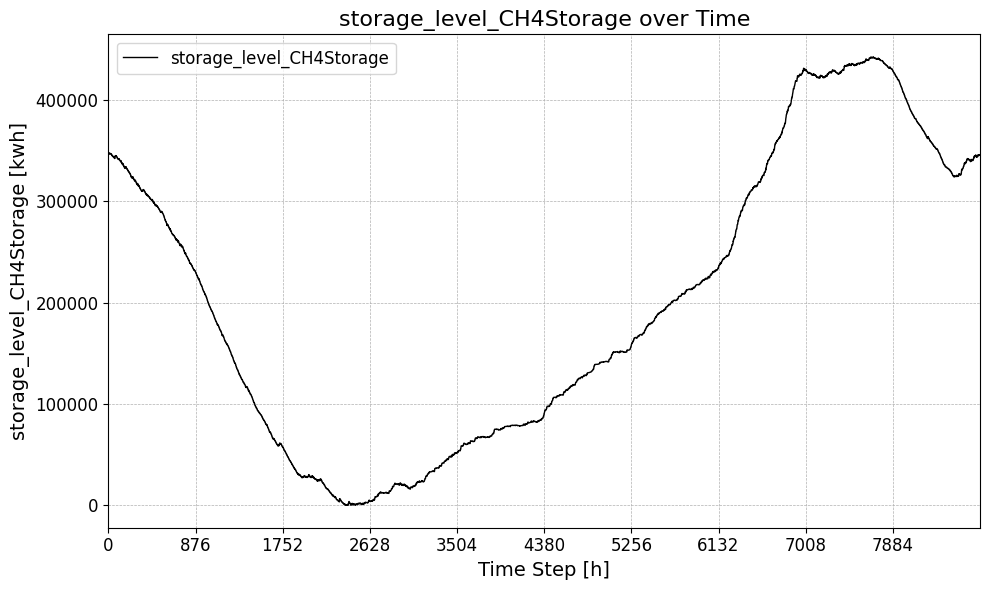

In [16]:
import json
import matplotlib.pyplot as plt

# JSON-Datei im aktuellen Arbeitsverzeichnis
file_name = 'GM_Heur_0_5.json'

# JSON-Daten laden
with open(file_name, 'r') as f:
    variable_values = json.load(f)

# Funktion zum Extrahieren von Variablenwerten aus den JSON-Daten
def extract_variable_values(variable_name):
    data = variable_values[variable_name]
    time_steps = sorted(data.keys(), key=lambda x: int(x))  # Zeitpunkte sortieren
    values = [data[ts] for ts in time_steps]
    return time_steps, values

# Funktion zum Erstellen einzelner Plots für jede Variable
def plot_each_variable_individually(variable_names):
    for var_name in variable_names:
        time_steps, values = extract_variable_values(var_name)
        
        plt.figure(figsize=(10, 6))
        plt.plot(time_steps, values, label=var_name, linewidth=1, color='black')
        plt.xlim(0, 8760)
        plt.xlabel('Time Step [h]', fontsize=14)
        plt.ylabel(f'{var_name} [kwh]', fontsize=14)
        plt.title(f'{var_name} over Time', fontsize=16)
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        
        # Weniger Beschriftungen auf der x-Achse
        if len(time_steps) > 10:
            plt.xticks(time_steps[::len(time_steps)//10], fontsize=12)
        else:
            plt.xticks(time_steps, fontsize=12)
        
        plt.yticks(fontsize=12)
        plt.legend(fontsize=12)
        plt.tight_layout()
        plt.savefig(f'{var_name}.png', dpi=300)  # Diagramme als hochauflösende PNG-Dateien speichern
        plt.show()

# Plotte die storage levels einzeln
component_outputs = ['storage_level_battery', 'storage_level_thermalStorage', 'storage_level_H2Storage', 'storage_level_CO2Storage', 'storage_level_CH4Storage']
plot_each_variable_individually(component_outputs)
